In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# MSFT =  mcrosoft 
df = yf.download('^NSEI', start = '2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100
2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700
2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200
2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900
2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200
...,...,...,...,...,...,...
2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100
2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500
2024-04-01,22455.000000,22529.949219,22427.750000,22462.000000,22462.000000,0


In [4]:
df['MA20'] = df['Adj Close'].rolling(20).mean()
df['MA50'] = df['Adj Close'].rolling(50).mean()

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,MA20,MA50
Date,,,,,,,,
2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100,NaN,NaN
2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700,NaN,NaN
2023-01-04,18230.650391,18243.000000,18020.599609,18042.949219,18042.949219,235200,NaN,NaN
2023-01-05,18101.949219,18120.300781,17892.599609,17992.150391,17992.150391,269900,NaN,NaN
2023-01-06,18008.050781,18047.400391,17795.550781,17859.449219,17859.449219,238200,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100,22149.294922,21949.161914
2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500,22155.722461,21957.808906
2024-04-01,22455.000000,22529.949219,22427.750000,22462.000000,22462.000000,0,22181.264941,21965.099922


In [6]:
df = df.dropna()

In [7]:
df = df[['Adj Close','MA20','MA50']]

In [8]:
df

,Adj Close,MA20,MA50
Date,,,
2023-03-14,17043.300781,17592.907422,17783.223906
2023-03-15,16972.150391,17545.022461,17758.717930
2023-03-16,16985.599609,17493.509961,17733.778906
2023-03-17,17100.050781,17446.720020,17714.920937
2023-03-20,16988.400391,17398.930078,17694.845937
...,...,...,...
2024-03-27,22123.650391,22149.294922,21949.161914
2024-03-28,22326.900391,22155.722461,21957.808906
2024-04-01,22462.000000,22181.264941,21965.099922


In [9]:
Buy = []
Sell = []

for i in range(len(df)):
    if df.MA20.iloc[i] > df.MA50[i] \
    and df.MA20.iloc[i-1] < df.MA50[i-1]:
        Buy.append(i)
    elif df.MA20.iloc[i] < df.MA50[i] \
    and df.MA20.iloc[i-1] > df.MA50[i-1]:
        Sell.append(i)



C:\Users\comp\AppData\Local\Temp\ipykernel_9972\2386420918.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.MA20.iloc[i] > df.MA50[i] \
C:\Users\comp\AppData\Local\Temp\ipykernel_9972\2386420918.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df.MA20.iloc[i] < df.MA50[i] \
C:\Users\comp\AppData\Local\Temp\ipykernel_9972\2386420918.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  and df.MA20.iloc[i-1] > df.MA50[i

In [10]:
Buy

[27, 126, 175]

In [11]:
Sell

[0, 116, 151]

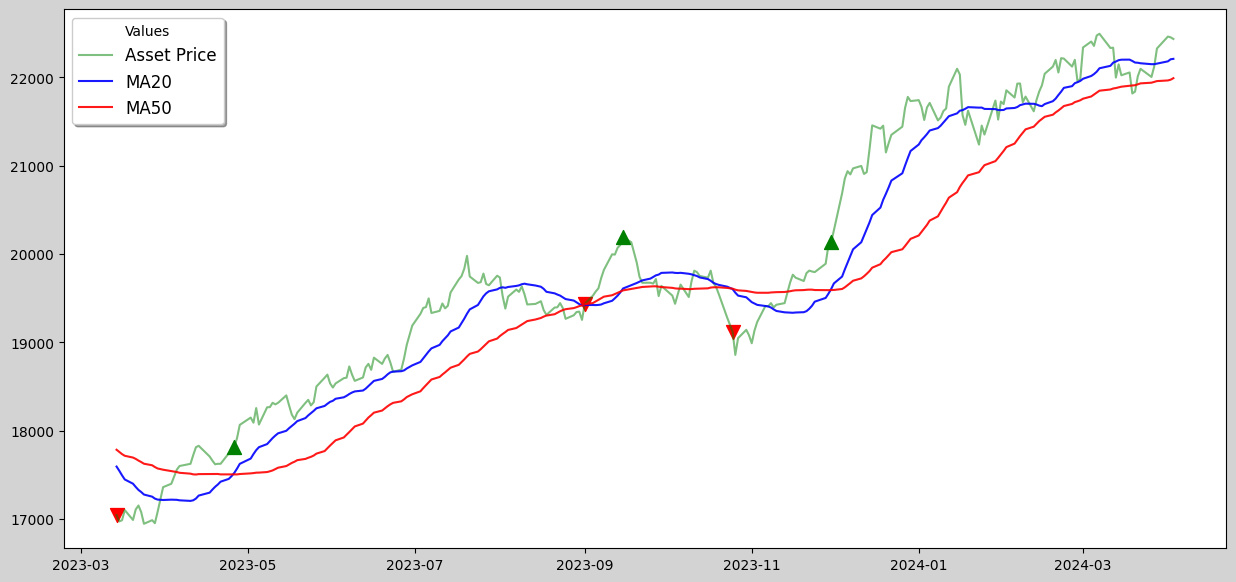

In [13]:
plt.figure(figsize=(15, 7), facecolor='lightgray', edgecolor='black')
plt.plot(df['Adj Close'], label = 'Asset Price', c='g', alpha=0.5)
plt.plot(df['MA20'], label = 'MA20', c='b', alpha = 0.9)
plt.plot(df['MA50'], label = 'MA50', c='r', alpha = 0.9)
#                  X                      Y
plt.scatter(df.iloc[Buy].index,df.iloc[Buy]['Adj Close'], marker = '^',color = 'g', s = 100)
plt.scatter(df.iloc[Sell].index,df.iloc[Sell]['Adj Close'], marker = 'v',color = 'r', s = 100)
plt.legend(loc='upper left', title='Values', fontsize='large', frameon=True, fancybox=True, shadow=True)
plt.show()